In [31]:
# Fazer o GROUP BY (SQL ou Python)
# Fazer análises de acordo com o GROUP BY
# Fazer gráficos

### Importando bibliotecas e lendo arquivos

In [32]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Lendo arquivo e alocando em uma variavel
base_estoque = pd.read_excel('base_AE/(1)base_estoque(original).xlsx')

### (ETL) Entendo a tabela e ja fazendo alterações:

#### Vizualizando a tabela:

In [34]:
#Dando uma olhada por cima da tabela
base_estoque

,Descrição,Portfólio,Estoque Inicial,Entrada,Saída,Estoque Final,Estoque Inicial.1,Entrada.1,Saída.1,Estoque Final.1,Custo Unitário,# Vendas Projetadas - 12 meses
0,Jade Refil Difusor Ambiente 250ml,PERFUMARIA CASA,600,229.0,400.0,429,27040.27,10373.66,18098.34,19315.59,45.024685,2347
1,Jade Vela TB Cristal 190G,PERFUMARIA CASA,7,NaN,NaN,7,203.97,NaN,NaN,203.97,29.138571,4
2,Jade Sabonete Barra 150G,PERFUMARIA CASA,1989,147.0,409.0,1727,21665.00,1602.78,4459.23,18808.55,10.890880,3084
3,Copo Short Drink Búzios Transparente,TABLEWARE,407,0.0,17.0,390,19637.62,0.00,821.27,18816.35,48.247051,472
4,Copo Long Drink Búzios Transparente,TABLEWARE,204,27.0,55.0,176,10034.31,1328.07,2705.34,8657.04,49.187727,494
...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Prancha de Surf Copacabana,TABLEWARE,0,3.0,4.0,-1,0.00,4085.00,2042.50,2042.50,-2042.500000,0
2211,Taça Mar,TABLEWARE,0,232.0,92.0,140,0.00,7825.36,3103.16,4722.20,33.730000,70
2212,Copo Short Drink Mar,TABLEWARE,0,234.0,92.0,142,0.00,7200.18,2830.84,4369.34,30.770000,71
2213,Xícara de Chá Copacabana,TABLEWARE,0,120.0,120.0,0,0.00,0.00,0.00,0.00,0.000000,0


In [35]:
#Entendo o tamanho da tabela
base_estoque.shape

(2215, 12)

#### Vizualizando os types e alterando:

In [36]:
# Entendendo os types dos dados
base_estoque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Descrição                       2215 non-null   object 
 1   Portfólio                       2215 non-null   object 
 2   Estoque Inicial                 2215 non-null   int64  
 3   Entrada                         1639 non-null   float64
 4   Saída                           1639 non-null   float64
 5   Estoque Final                   2215 non-null   int64  
 6   Estoque Inicial.1               2215 non-null   float64
 7   Entrada.1                       1639 non-null   float64
 8   Saída.1                         1639 non-null   float64
 9   Estoque Final.1                 2215 non-null   float64
 10  Custo Unitário                  2215 non-null   float64
 11  # Vendas Projetadas - 12 meses  2215 non-null   int64  
dtypes: float64(7), int64(3), object(2)

In [37]:
# Transformando object em string para ser mais facil na hora de transferir para o SQL e não dar incompatibilidade.

# Transformando Descrição
base_estoque['Descrição'] = base_estoque['Descrição'].astype(pd.StringDtype())

# Transoformando Portfólio
base_estoque['Portfólio'] = base_estoque['Portfólio'].astype(pd.StringDtype())

In [38]:
# Averiquando se está correto a transformação
base_estoque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Descrição                       2215 non-null   string 
 1   Portfólio                       2215 non-null   string 
 2   Estoque Inicial                 2215 non-null   int64  
 3   Entrada                         1639 non-null   float64
 4   Saída                           1639 non-null   float64
 5   Estoque Final                   2215 non-null   int64  
 6   Estoque Inicial.1               2215 non-null   float64
 7   Entrada.1                       1639 non-null   float64
 8   Saída.1                         1639 non-null   float64
 9   Estoque Final.1                 2215 non-null   float64
 10  Custo Unitário                  2215 non-null   float64
 11  # Vendas Projetadas - 12 meses  2215 non-null   int64  
dtypes: float64(7), int64(3), string(2)

#### Visualizando nulls e valores nulos (0), e tomando decisões:

In [39]:
# Identificando a quantidade de nulls de duas formas, a forma " " e a forma "(vazio)"

#retorna o número de valores ausentes na forma " " para cada coluna.
base_estoque.isna().sum()

Descrição                           0
Portfólio                           0
Estoque Inicial                     0
Entrada                           576
Saída                             576
Estoque Final                       0
Estoque Inicial.1                   0
Entrada.1                         576
Saída.1                           576
Estoque Final.1                     0
Custo Unitário                      0
# Vendas Projetadas - 12 meses      0
dtype: int64

Coméntario:

Dando uma olhada pelo excel, onde é mais facil a vizualização da tabela como um todo neste caso. Os nulos no formato ' ' só ocorrem quando não a alteração no estoque (estoque inicial = estoque final), portanto no caso esses nulos tem valor de négocio.

OBS: Acontece uma situação pararecida quando em relação a '-' (0), já que quando somente uma alteração no estoque acontece seja ela 'entrada' ou 'saída' ocorre que a outra parte sendo ela 'entrada' ou 'saída' será '-' (0). Assim o valor '-' = 0, é relevante para o négocio.

In [40]:
#Calculando a quantidade de '(vazio)' por coluna

#Criando dicionario para armazenar a contagem de '(vazio)' por coluna
contagens_por_coluna = {}

#Contando '(vazio)' por coluna
for coluna in base_estoque.columns:
    contagem = base_estoque[coluna].astype(str).str.count('(vazio)').sum()
    contagens_por_coluna[coluna] = contagem

#Mostrando a contagem
print("Contagem de '(vazio)' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

#Identificando as dimensões para ver se foi corretamente excluido posteriormente
print('')
print('Dimensões:')
print(base_estoque.shape)

Contagem de '(vazio)' em cada coluna:
Descrição: 38
Portfólio: 0
Estoque Inicial: 0
Entrada: 0
Saída: 0
Estoque Final: 0
Estoque Inicial.1: 0
Entrada.1: 0
Saída.1: 0
Estoque Final.1: 0
Custo Unitário: 0
# Vendas Projetadas - 12 meses: 0

Dimensões:
(2215, 12)


Coméntario:

Também Dando uma olhada pelo excel. É possível notar que os valores nulls no formato '(vazio)' presentes só na coluna descrição acarretam em linhas que não identificam nenhum produto. Isso acarreta em linhas que possuem informações relevantes 'Estoque Inicial, 'Entrada', 'Saída', 'Estoque Final', mas não tem a 'fonte' desses dados.

 O que poderia ser feito para corrigir isso seria: Ou entrar em contato com a fonte dos dados para ajustar esses detalhes e recuperar informações. Ou assumir que será perdido determinada quantidade de informações relacionadas a produtos e manter os dados para contribuir com uma granularidade maior (portfolios) na hora de fazer análises de médidas centrais. Ou ainda excluir as linhas. Nesse caso como eu não tenho contato com a fonte dos dados, vou manter as linhas e continuar a análise, assim eu consigo ter um resultado real referente a questões relacionadas aos portfolios.

#### Entendendo cada coluna:

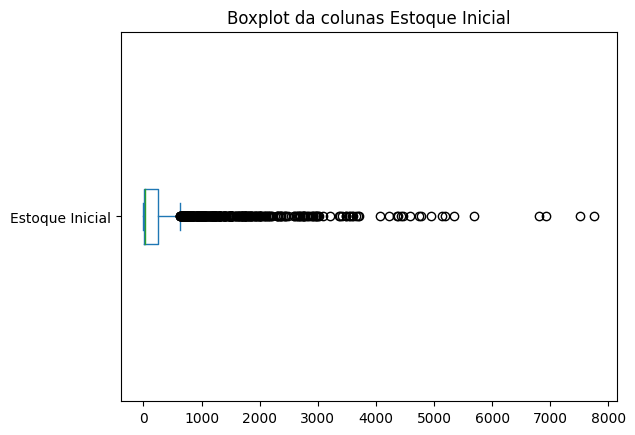

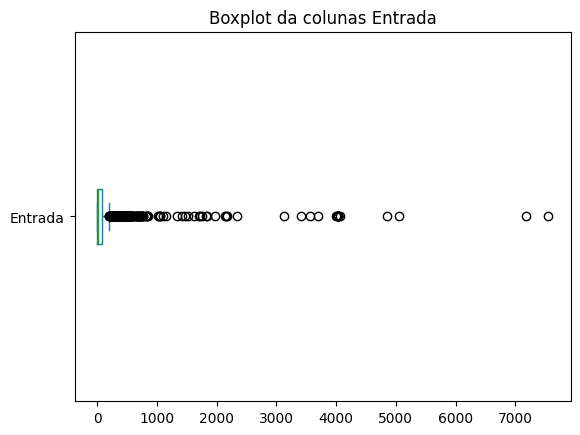

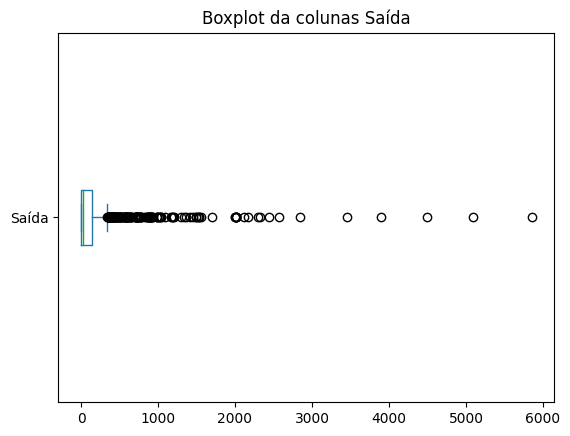

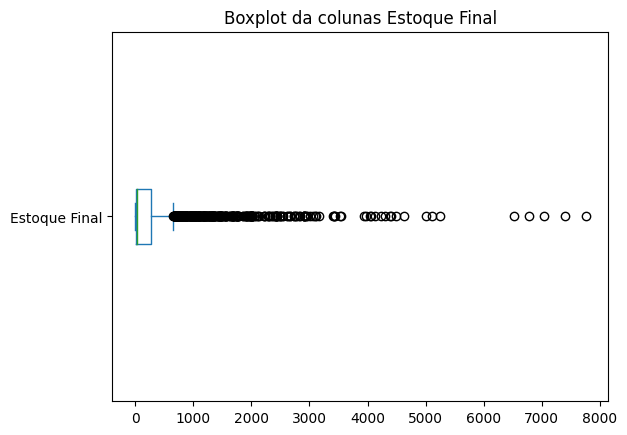

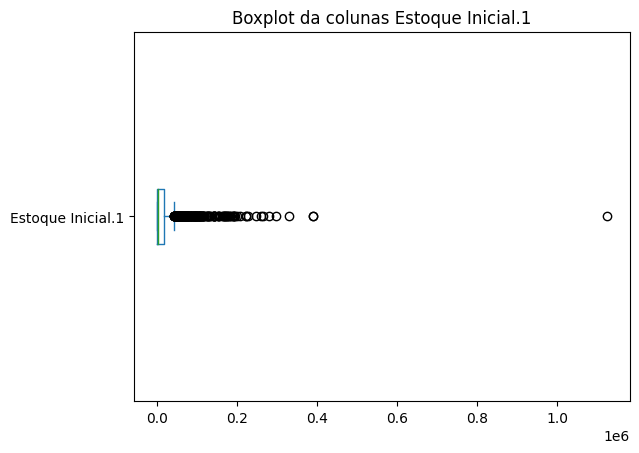

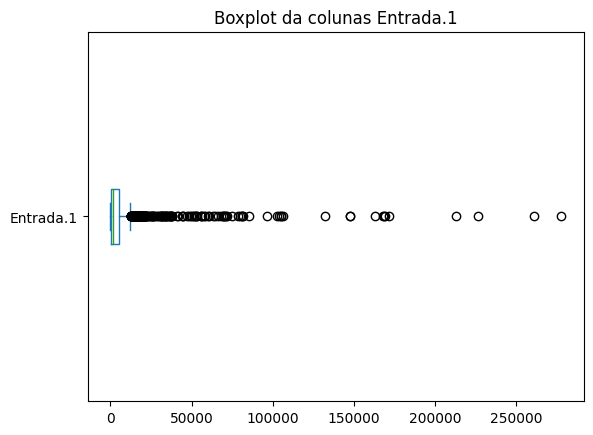

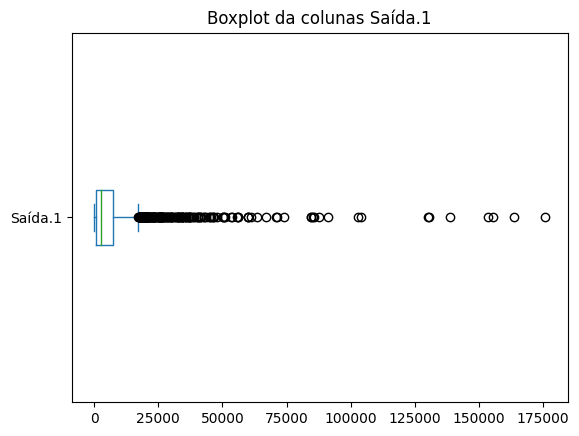

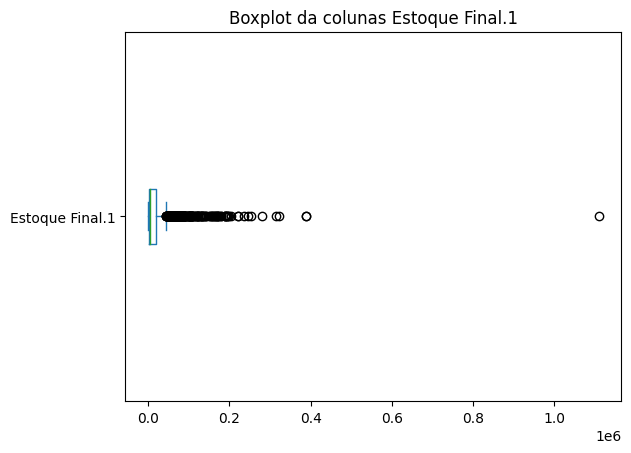

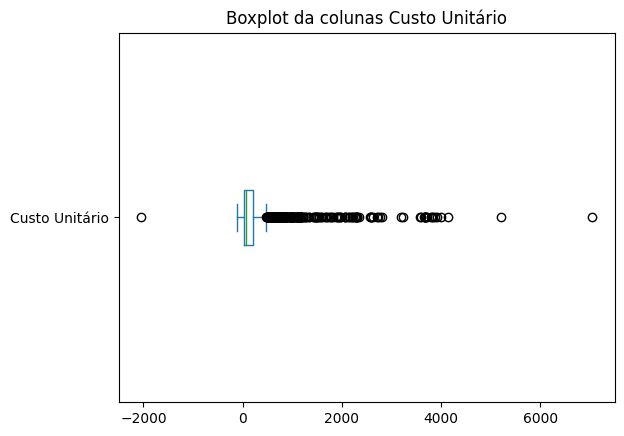

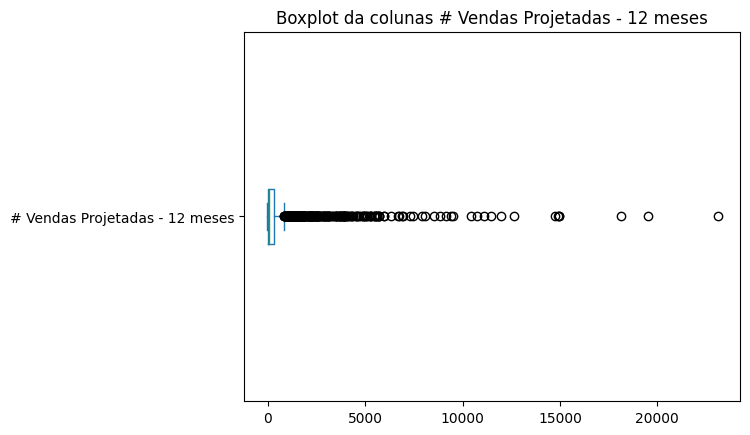

In [41]:
# Criando boxplot para cada coluna para ver se estão de acordo.

# Crie um boxplot para cada coluna numérica
for colunas in base_estoque.select_dtypes(include='number'):
    plt.figure()
    base_estoque[colunas].plot(kind='box', vert=False)
    plt.title(f'Boxplot da colunas {colunas}')

# Exiba os boxplots
plt.show()

In [42]:
# Trançando os valores mínimos e máximos de cada coluna

print('Valores mínimos de acordo com cada coluna:')
print("")
for coluna in base_estoque.select_dtypes(include='number'):
    print("")
    print(f'{coluna}: ')
    print(base_estoque[coluna].min())

print("")
print("")
print('Valores máximos de acordo com cada coluna:')
print("")
for coluna in base_estoque.select_dtypes(include='number'):
    print("")
    print(f'{coluna}: ')
    print(base_estoque[coluna].max())

Valores mínimos de acordo com cada coluna:


Estoque Inicial: 
-3

Entrada: 
0.0

Saída: 
0.0

Estoque Final: 
-8

Estoque Inicial.1: 
-498.68

Entrada.1: 
0.0

Saída.1: 
0.0

Estoque Final.1: 
-498.68

Custo Unitário: 
-2042.5

# Vendas Projetadas - 12 meses: 
-57


Valores máximos de acordo com cada coluna:


Estoque Inicial: 
7757

Entrada: 
7547.0

Saída: 
5857.0

Estoque Final: 
7757

Estoque Inicial.1: 
1125065.68

Entrada.1: 
277868.36

Saída.1: 
175884.72

Estoque Final.1: 
1109446.3199999998

Custo Unitário: 
7042.92

# Vendas Projetadas - 12 meses: 
23102


Coméntario:

Com esses resultados de Boxplots, mínimo e máximos valores, é possivel ver que as colunas fazem sentido, e a grande quantidade de outsiders no boxplots támbem fazem sentido já que são diversos produtos. O único detalhe que não faz sentido, são os valores negativos em determinadas colunas.

Aprofundando mais na incorrência. Ela pode ser explicada por perda produtos no decorrer do armazenamento no estoque. Essa explicação só não se encaixa no Custo Unitário, que realmente há outsiders incorretos.

OBS: Estou mantendo a versão antes da análise da tabela em um repositorio privado, e em caso de necessidade é possível recuperar este dataframe.

In [43]:
#Indentificando outsiders incorretos da coluna 'Custo Unitário'.
linhas_negativas = base_estoque[base_estoque['Custo Unitário'] < 0]

print(linhas_negativas)

                             Descrição  Portfólio  Estoque Inicial  Entrada  \
320   Set Pratos Sobremesa Pérgola 4pc  TABLEWARE               -2      NaN   
321       Set 4 Xícaras de Chá Pérgola  TABLEWARE               -1      NaN   
2210        Prancha de Surf Copacabana  TABLEWARE                0      3.0   

      Saída  Estoque Final  Estoque Inicial.1  Entrada.1  Saída.1  \
320     NaN             -2             230.74        NaN      NaN   
321     NaN             -1             119.49        NaN      NaN   
2210    4.0             -1               0.00     4085.0   2042.5   

      Estoque Final.1  Custo Unitário  # Vendas Projetadas - 12 meses  
320            230.74         -115.37                               0  
321            119.49         -119.49                               0  
2210          2042.50        -2042.50                               0  


Sendo poucas linhas é possível alterar diretamente no excel.

### Exportando a base e Importando com alterações diretas no excel:

In [44]:
#Exportando dados
#base_estoque.to_excel('./base_AE/(2)base_limpa.xlsx')

In [45]:
#Importando tabela com alterações
base_variaveis = pd.read_excel('./base_AE/(3)base_com_variaveis.xlsx')

In [46]:
base_variaveis

,Descrição,Portfólio,Estoque Inicial (Quant),Entrada (Quant),Saída (Quant),Estoque Final (Quant),Estoque Inicial (Valor),Entrada (Valor),Saída (Valor),Estoque Final (Valor),Status Estoque,Estoque Final em relação a Estoque Inicial (%),Custo Unitário,# Vendas Projetadas - 12 meses (Quant),# Vendas Projetadas - 12 meses (Valor),Vendas Projetadas - Média Mensal,Prazo de venda do Estoque Atual (Mês)
0,Jade Refil Difusor Ambiente 250ml,PERFUMARIA CASA,600,229.0,400.0,429,27040.27,10373.66,18098.34,19315.59,Produto em Ordem,0.715000,45.024685,2347,105672.936434,195.583333,2.193438
1,Jade Vela TB Cristal 190G,PERFUMARIA CASA,7,NaN,NaN,7,203.97,NaN,NaN,203.97,Produto em Ordem,1.000000,29.138571,4,116.554286,0.333333,21.000000
2,Jade Sabonete Barra 150G,PERFUMARIA CASA,1989,147.0,409.0,1727,21665.00,1602.78,4459.23,18808.55,Produto em Ordem,0.868276,10.890880,3084,33587.474349,257.000000,6.719844
3,Copo Short Drink Búzios Transparente,TABLEWARE,407,0.0,17.0,390,19637.62,0.00,821.27,18816.35,Produto em Ordem,0.958231,48.247051,472,22772.608205,39.333333,9.915254
4,Copo Long Drink Búzios Transparente,TABLEWARE,204,27.0,55.0,176,10034.31,1328.07,2705.34,8657.04,Produto em Ordem,0.862745,49.187727,494,24298.737273,41.166667,4.275304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Prancha de Surf Copacabana,TABLEWARE,0,3.0,4.0,-1,0.00,4085.00,2042.50,2042.50,Produto em Falta,0.000000,2042.500000,0,0.000000,0.000000,0.000000
2211,Taça Mar,TABLEWARE,0,232.0,92.0,140,0.00,7825.36,3103.16,4722.20,Produto em Ordem,0.000000,33.730000,70,2361.100000,5.833333,24.000000
2212,Copo Short Drink Mar,TABLEWARE,0,234.0,92.0,142,0.00,7200.18,2830.84,4369.34,Produto em Ordem,0.000000,30.770000,71,2184.670000,5.916667,24.000000
2213,Xícara de Chá Copacabana,TABLEWARE,0,120.0,120.0,0,0.00,0.00,0.00,0.00,Produto em Ordem,0.000000,0.000000,0,0.000000,0.000000,0.000000


In [47]:
base_variaveis.columns

Index(['Descrição', 'Portfólio', 'Estoque Inicial (Quant)', 'Entrada (Quant)',
       'Saída (Quant)', 'Estoque Final (Quant)', 'Estoque Inicial (Valor)',
       'Entrada (Valor)', 'Saída (Valor)', 'Estoque Final (Valor)',
       'Status Estoque', 'Estoque Final em relação a Estoque Inicial (%)',
       'Custo Unitário', '# Vendas Projetadas - 12 meses (Quant)',
       '# Vendas Projetadas - 12 meses (Valor)',
       'Vendas Projetadas - Média Mensal',
       'Prazo de venda do Estoque Atual (Mês)'],
      dtype='object')

In [48]:
base_variaveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 17 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Descrição                                       2215 non-null   object 
 1   Portfólio                                       2215 non-null   object 
 2   Estoque Inicial (Quant)                         2215 non-null   int64  
 3   Entrada (Quant)                                 1639 non-null   float64
 4   Saída (Quant)                                   1639 non-null   float64
 5   Estoque Final (Quant)                           2215 non-null   int64  
 6   Estoque Inicial (Valor)                         2215 non-null   float64
 7   Entrada (Valor)                                 1639 non-null   float64
 8   Saída (Valor)                                   1639 non-null   float64
 9   Estoque Final (Valor)                    

In [49]:
base_variaveis['# Vendas Projetadas - 12 meses (Valor)'] = base_variaveis['# Vendas Projetadas - 12 meses (Valor)'].astype('int64')


O que foi alterado EXCEL:

Foi alterados os títulos das colunas do dataset original para um melhor entendimento como um todo. E foi adicionado as seguintes colunas:

Status Estoque:
Coluna que determina se o produto está positivo ou negativo no estoque.

Estoque Final em relação a Estoque Inicial (%):
Determina a porcentagem do estoque atual em relação ao o antigo. Com isso é possível determinar qual produto teve um aumento no estoque ou qual produto teve uma baixa no estoque ao decorrer do mês.

Vendas Projetadas - 12 meses (Valor):
Traz a multiplicação entre a coluna 'Vendas Projetadas' e a coluna 'Custo Unítario', assim conseguindo a receita anual prevista para o produto.

Vendas Projetadas - 1 mês (Média Mensal):
Determina a média mensal de acordo com a coluna 'Vendas Projetadas para - 12 meses'.

Prazo de venda do Estoque Atual (Mensal):
Retorna o valor em mês do prazo de venda do estoque atual, se calculo é feito se baseando nas vendas projetadas mensalmente como divisor do Estoque atual. Assim é possível determinar uma previsão a partir da média do valor dos próximos meses.

### Adicionando Varíaveis (Análise ABC):

Aqui eu vou estar encontrando os percentuais em 3 terços (33%, 66%, 100%) das colunas 'Estoque Final (Quant)' e '# Vendas Projetadas - 12 meses (Valor)', afim de criar três coluna de classficação:

Classificação Estoque Final (Quant):
Para classificar a quantidade atual de produto em estoque em A, B, C. Sendo A poucos produtos, B intermediario, e C grande quantidade de produtos.



Classificação Vendas Projetadas (Valor):
Para classificar a renda projetada anual em A, B, C. Sendo A produtos com alta renda, B produtos com renda intermediaria, e C produtos com baixa renda.



Classificação Prioriodade:
Para classificar as combinações entre as classificação 'Estoque Final Quant' e a classificação 'Vendas Projetadas (Valor)'.
Sendo as possibilidades (Classificação Estoque Final (Quant) / Classificação Vendas Projetadas (Valor)):

AA - Sendo alta prioridade, tendo poucos produtos no estoque e alta renda. 

AB - Sendo alta prioridade, tendo poucos produtos e renda intermediaria.

AC - Sendo média prioridade, tendo poucos produtos e baixa renda.

BA - Sendo alta prioridade, tendo quantidade regular de produtos e alta renda.

BB - Sendo média prioridade, tendo quantidade regular de produtos e renda intermidiaria.

BC - Sendo baixa prioridade, tendo quantidade regular de produtos e baixa renda.

CA - Sendo média prioridade, tendo quantidade alta de produtos e alta renda.

CB - Sendo baixa prioridade, tendo quantidade alta de produtos e renda intermediaria.

CC - Sendo baixa prioridade, tendo quantidade alta de produtos e baixa renda.

OBS: A prioridade é no ambito de venda, não se encaixa no ambito de produtos parados.

In [50]:
#Encontrando o porcentual do Estoque atual Quantitativamente.
dados_ordenados_quantidade = np.sort(base_variaveis['Estoque Final (Quant)'])

percentil_33 = np.percentile(dados_ordenados_quantidade, 33)
percentil_66 = np.percentile(dados_ordenados_quantidade, 66)
percentil_100 = np.percentile(dados_ordenados_quantidade, 100)


print(f"Valor que separa os 33% da coluna Estoque Final (Quant): , {percentil_33} produtos")
print(f"Valor que separa os 66% da coluna Estoque Final (Quant): , {percentil_66} produtos")
print(f"Valor que separa os 100% da coluna Estoque Final (Quant): , {percentil_100} produtos")

Valor que separa os 33% da coluna Estoque Final (Quant): , 10.0 produtos
Valor que separa os 66% da coluna Estoque Final (Quant): , 138.24 produtos
Valor que separa os 100% da coluna Estoque Final (Quant): , 7757.0 produtos


In [51]:
#Encontrando o porcentual do Estoque atual em questão de Valor.
dados_ordenados_valor = np.sort(base_variaveis['# Vendas Projetadas - 12 meses (Valor)'])

percentil_33 = np.percentile(dados_ordenados_valor, 33)
percentil_66 = np.percentile(dados_ordenados_valor, 66)
percentil_100 = np.percentile(dados_ordenados_valor, 100)

print(f"Valor que separa os 33% da coluna Vendas Projetadas - 12 meses (Valor): R$ {percentil_33}")
print(f"Valor que separa os 66% da coluna Vendas Projetadas - 12 meses (Valor): R$ {percentil_66}")
print(f"Valor que separa os 100% da coluna Vendas Projetadas - 12 meses (Valor): R$ {percentil_100}")

Valor que separa os 33% da coluna Vendas Projetadas - 12 meses (Valor): R$ 1652.0
Valor que separa os 66% da coluna Vendas Projetadas - 12 meses (Valor): R$ 13248.16
Valor que separa os 100% da coluna Vendas Projetadas - 12 meses (Valor): R$ 1137030.0


In [52]:
def classificando_quant(valor):
    if valor < 0:
        return 'Não aplicavel'
    elif valor < 10:
        return 'A'
    elif valor < 138:
        return 'B'
    elif valor < 7757:
        return 'C'
    else:
        return 'Não aplicavel'

base_variaveis['Classificação Estoque Final (Quant)'] = base_variaveis['Estoque Final (Quant)'].apply(classificando_quant)

In [53]:
def classificando_valor(valor):
    if valor <= 0:
        return 'Não aplicavel'
    elif valor < 1653:
        return 'C'
    elif valor < 13249:
        return 'B'
    elif valor < 1137031:
        return 'A'
    else:
        return 'Não aplicavel'

base_variaveis['Classificação Vendas Projetadas (Valor)'] = base_variaveis['# Vendas Projetadas - 12 meses (Valor)'].apply(classificando_valor) #Vendas Projetadas - 12 meses (Valor) = Projeção de receita de produtos em relação a 1 ano

In [54]:
def classificacando_prioridade(coluna_1, coluna_2):
    if coluna_1 == 'Não aplicavel' or coluna_2 == 'Não aplicavel':
        return 'Não aplicavel'
    else:
        return coluna_1 + coluna_2
        

# Aplicando a função às duas colunas e criando a nova coluna
base_variaveis['Classificacando prioridade'] = base_variaveis.apply(lambda row: classificacando_prioridade(row['Classificação Estoque Final (Quant)'], row['Classificação Vendas Projetadas (Valor)']), axis=1)


### Adicionando Varíaveis (Corte de estoque):

In [55]:
def classificando_corte_estoque(valor):
    if valor <= 0:
        return 'Não aplicavel'
    elif valor < 0.8:
        return 'Disponibilidade menor que 80%'
    elif valor < 0.95:
        return 'Disponibilidade a 80%'
    elif valor < 1:
        return 'Disponibilidade a 95%'
    elif valor >= 1:
        return 'Disponibilidade maior ou igual a 100%'
    else:
        return 'Não aplicavel'

base_variaveis['Concentração de estoque por item coorte: 80%, 95% e 100%'] = base_variaveis['Estoque Final em relação a Estoque Inicial (%)'].apply(classificando_corte_estoque)

### Exportando a base e Importando com alterações diretas no excel:

In [56]:
#Exportando dados
#base_variaveis.to_excel('./base_AE/(4)base_com_variaveis_e_indicaores(final).xlsx')

In [57]:
base_graficos = pd.read_excel('./base_AE/(5)base_gráficos.xlsx')

In [58]:
base_graficos

,Descrição,Portfólio,Estoque Inicial (Quant),Entrada (Quant),Saída (Quant),Estoque Final (Quant),Estoque Inicial (Valor),Entrada (Valor),Saída (Valor),Estoque Final (Valor),...,"Concentração de estoque por item coorte: 80%, 95% e 100%",Custo Unitário,# Vendas Projetadas - 12 meses (Quant),# Vendas Projetadas - 12 meses (Valor),Vendas Projetadas - 1 mês (Média Mensal),Prazo de venda do Estoque Atual (Mês),Tempo de estoque por produtos (Mês),Classificação Estoque Final (Quant),Classificação Vendas Projetadas (Valor),Classificacando prioridade
0,Jade Refil Difusor Ambiente 250ml,PERFUMARIA CASA,600,229.0,400.0,429,27040.27,10373.66,18098.34,19315.59,...,Disponibilidade menor que 80%,45.024685,2347,105672.936434,195.583333,2.193438,3.067746,C,A,CA
1,Jade Vela TB Cristal 190G,PERFUMARIA CASA,7,NaN,NaN,7,203.97,NaN,NaN,203.97,...,Disponibilidade maior ou igual a 100%,29.138571,4,116.554286,0.333333,21.000000,21.000000,A,C,AC
2,Jade Sabonete Barra 150G,PERFUMARIA CASA,1989,147.0,409.0,1727,21665.00,1602.78,4459.23,18808.55,...,Disponibilidade a 80%,10.890880,3084,33587.474349,257.000000,6.719844,7.739300,C,A,CA
3,Copo Short Drink Búzios Transparente,TABLEWARE,407,0.0,17.0,390,19637.62,0.00,821.27,18816.35,...,Disponibilidade a 95%,48.247051,472,22772.608205,39.333333,9.915254,10.347458,C,A,CA
4,Copo Long Drink Búzios Transparente,TABLEWARE,204,27.0,55.0,176,10034.31,1328.07,2705.34,8657.04,...,Disponibilidade a 80%,49.187727,494,24298.737273,41.166667,4.275304,4.955466,C,A,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Prancha de Surf Copacabana,TABLEWARE,0,3.0,4.0,-1,0.00,4085.00,2042.50,2042.50,...,Não aplicavel,2042.500000,0,0.000000,0.000000,0.000000,0.000000,Não aplicavel,Não aplicavel,Não aplicavel
2211,Taça Mar,TABLEWARE,0,232.0,92.0,140,0.00,7825.36,3103.16,4722.20,...,Não aplicavel,33.730000,70,2361.100000,5.833333,24.000000,0.000000,C,B,CB
2212,Copo Short Drink Mar,TABLEWARE,0,234.0,92.0,142,0.00,7200.18,2830.84,4369.34,...,Não aplicavel,30.770000,71,2184.670000,5.916667,24.000000,0.000000,C,B,CB
2213,Xícara de Chá Copacabana,TABLEWARE,0,120.0,120.0,0,0.00,0.00,0.00,0.00,...,Não aplicavel,0.000000,0,0.000000,0.000000,0.000000,0.000000,A,Não aplicavel,Não aplicavel


Foi adiciona  a Coluna 'Tempo de estoque por produtos (Mês)'. Coluna essa que tem a ideia de mostrar os produtos que se manteram no estoque em determinado periodo, se baseando na coluna 'entrada' e coluna '# Vendas Projetadas - 12 meses (Quant)', com isso é possível ver por quanto tempo estão os produtos armazenados no estoque atual.

Foram adicionadas támbem as colunas 'Concentração de estoque por item corte: 80%, 95% e 100%', 'Classificação Estoque Final (Quant)', 'Classificação Vendas Projetadas (Valor)', 'Classificacando prioridade', mas foram feitos por aqui notebook, nós codigos acima. 

A análise ABC já foi explicada, porém o 'item corte' ainda não. Ele é métrica  que puxa a quantidade de estoque final em relação ao estoque inicial e a coluna 'item corte' em si determina se está a cima de 80%, 95% ou 100%. Essas porcentagens ajudam a entender a disponibilidade que cada produto em estoque.

### Gráficos e separações por portfólio:

In [61]:
#Separando o Dataframe em partes de acordo com o Portfólio
separacao_perf_casa = base_graficos[base_graficos['Portfólio'] == 'PERFUMARIA CASA']
separacao_tableware = base_graficos[base_graficos['Portfólio'] == 'TABLEWARE']
separacao_perf_pessoal = base_graficos[base_graficos['Portfólio'] == 'PERFUMARIA PESSOAL']
separacao_tania_pele = base_graficos[base_graficos['Portfólio'] == 'TANIA PELE']